   Id                                     Name  Gender  \
0   1                       Harry James Potter    Male   
1   2                    Ronald Bilius Weasley    Male   
2   3                    Hermione Jean Granger  Female   
3   4  Albus Percival Wulfric Brian Dumbledore    Male   
4   5                            Rubeus Hagrid    Male   

                                                 Job       House  \
0                                            Student  Gryffindor   
1                                            Student  Gryffindor   
2                                            Student  Gryffindor   
3                                         Headmaster  Gryffindor   
4  Keeper of Keys and Grounds | Professor of Care...  Gryffindor   

                                 Wand              Patronus  \
0         11"  Holly  phoenix feather                  Stag   
1          12" Ash unicorn tail hair   Jack Russell terrier   
2  10¾"  vine wood dragon heartstring                

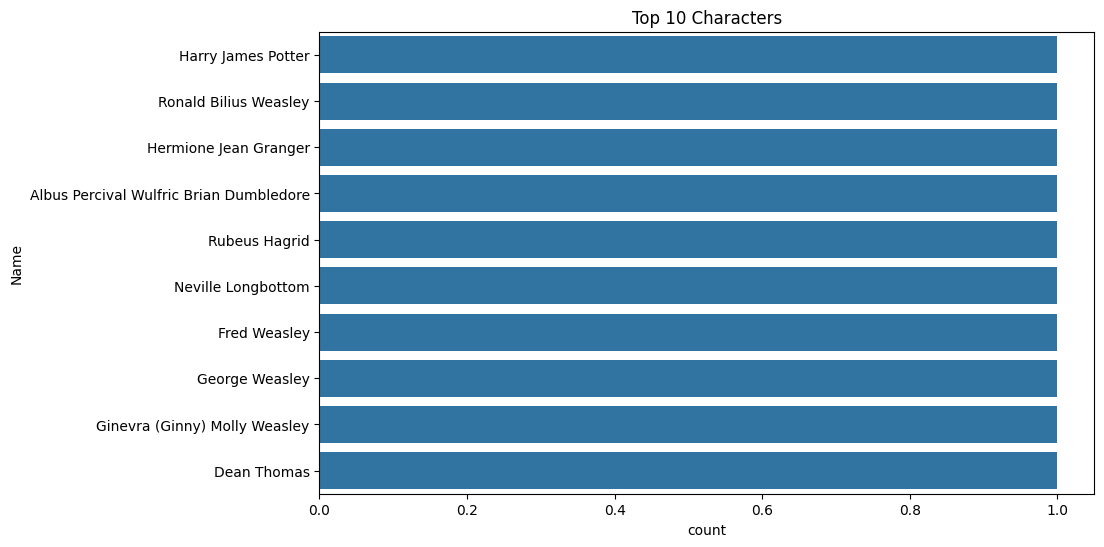

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (start with characters.csv)
df = pd.read_csv("../data/characters.csv", sep=";") # path to your CSV

# Quick look at the data
print(df.head())
print(df.info())

# Example chart: Top 10 characters by count
plt.figure(figsize=(10,6))
sns.countplot(y="Name", data=df, order=df["Name"].value_counts().index[:10])
plt.title("Top 10 Characters")
plt.show()



In [6]:
import pandas as pd
import glob
import os

# Get paths of all movie CSVs
movie_files = glob.glob("../data/harry potter *.csv")

# List to hold individual dataframes
df_list = []

# Read each CSV (semicolon-separated) and add a 'Movie' column
for file in movie_files:
    movie_name = os.path.basename(file).replace(".csv", "")
    temp_df = pd.read_csv(file, sep=";")
    temp_df['Movie'] = movie_name
    df_list.append(temp_df)

# Combine all movie dataframes into one
movies_df = pd.concat(df_list, ignore_index=True)

# Quick look
print(movies_df.head())
print(movies_df.info())


    Character                                           Sentence  \
0  Dumbledore  I should've known that you would be here, Prof...   
1  McGonagall                Good evening, Professor Dumbledore.   
2  McGonagall                        Are the rumors true, Albus?   
3  Dumbledore                          I'm afraid so, professor.   
4  Dumbledore                              The good and the bad.   

            Movie CHARACTER SENTENCE  
0  Harry Potter 1       NaN      NaN  
1  Harry Potter 1       NaN      NaN  
2  Harry Potter 1       NaN      NaN  
3  Harry Potter 1       NaN      NaN  
4  Harry Potter 1       NaN      NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4925 entries, 0 to 4924
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Character  3287 non-null   object
 1   Sentence   3287 non-null   object
 2   Movie      4925 non-null   object
 3   CHARACTER  1638 non-null   object
 4   SENTENCE   1

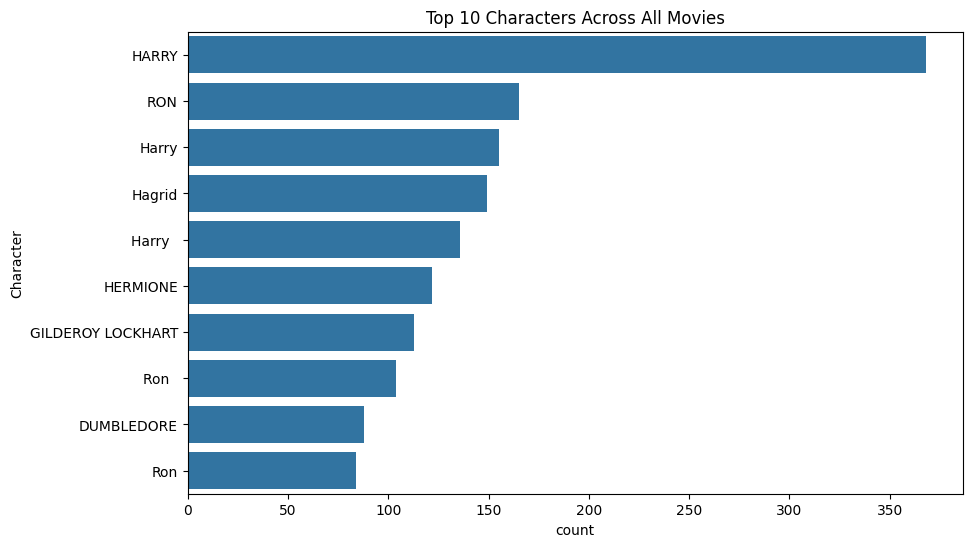

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(y="Character", data=movies_df, order=movies_df["Character"].value_counts().index[:10])
plt.title("Top 10 Characters Across All Movies")
plt.show()



In [8]:
print(movies_df.columns)


Index(['Character', 'Sentence', 'Movie', 'CHARACTER', 'SENTENCE'], dtype='object')


In [10]:
top_characters_per_movie = movies_df.groupby('Movie')['Character'].value_counts().groupby(level=0).head(5)
print(top_characters_per_movie)


Movie           Character        
Harry Potter 1  Harry                155
                Hagrid               149
                Harry                136
                Ron                  104
                Ron                   84
Harry Potter 2  HARRY                368
                RON                  165
                HERMIONE             122
                GILDEROY LOCKHART    113
                DUMBLEDORE            88
Name: count, dtype: int64


In [11]:
dialogue_counts = movies_df.groupby('Movie')['Sentence'].count()
print(dialogue_counts)


Movie
Harry Potter 1    1587
Harry Potter 2    1700
Harry Potter 3       0
Name: Sentence, dtype: int64


In [13]:
print(movies_df.columns)


Index(['Character', 'Sentence', 'Movie', 'CHARACTER', 'SENTENCE'], dtype='object')
